<a href="https://colab.research.google.com/github/RohanBh23/Solving-System-of-Linear-Equations-using-Quantum-Computers/blob/main/HHL_Algorithm_by_Rohan_Bhatia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving system of linear equations using Quantum Computers**

*Rohan Bhatia* \
*Delhi Technological University* 


In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import pandas as pd
#import matplotlib as mpl
from math import pi
import numpy as np
import matplotlib.pyplot as plt


IBMQ.save_account('0c5f09afe94bb9159f65f3ae983bdad4fd4fe1ef0fe97a1f9167ffc44c733c5ccb21d848987d3c1796fc3a40e2143fc5f902ddb2526a3df548c3b0ea53cba38f')
provider = IBMQ.load_account()

## **Solving set of 4 linear equations with HHL** 

A system of linear equations of the form; $A x = b$ is calculated by finding the inverse of matrix $A$
$$x = A^{-1}b$$

The matrix A has to be a Hermitian matrix, i.e. $A = A^\dagger$

In our example, for convineance $b$ is taken as the below matrix so that it can be easily created with 2 basic unitary (Hadamard) gates on 2 qubits.
$$b = \begin{bmatrix} 0.5 \\
0.5\\
0.5\\
0.5
\end{bmatrix}$$


$$|b\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle$$

### **Initial state of Circuit**

For solving a 4 equation system, 7 qubits are required; 4 to store the eigenvalues of the 4x4 $A$ matrix, 2 qubits to take the input $b$ and give the final output $x$, and 1 Ancilla qubit to facilitate controlled rotations. The Intital state of the circuit is given by -   

$$|0\rangle^A \left(|0\rangle^{\otimes n}\right)^M |0\rangle^I$$

Where superscripts $A$, $M$, $I$ represent $\textbf{Ancillary register}$, $\textbf{Matrix register}$ i.e. the register which will keep the eigenvalues of $A$, and $\textbf{Input register}$ respectively.

In [ ]:
qc = QuantumCircuit(7, 2)

# Input b in input registers (5,6)
for i in range(5,7):
    qc.h(i)
    qc.barrier()
    
#Initially applying Hadamard gate on Main register (1,4)
for i in range (1,5):
    qc.h(i)

qc.draw()

░       ░      
q_0: ──────░───────░──────
           ░       ░ ┌───┐
q_1: ──────░───────░─┤ H ├
           ░       ░ ├───┤
q_2: ──────░───────░─┤ H ├
           ░       ░ ├───┤
q_3: ──────░───────░─┤ H ├
           ░       ░ ├───┤
q_4: ──────░───────░─┤ H ├
     ┌───┐ ░       ░ └───┘
q_5: ┤ H ├─░───────░──────
     └───┘ ░ ┌───┐ ░      
q_6: ──────░─┤ H ├─░──────
           ░ └───┘ ░      
c: 2/═════════════════════

## **Quantum Phase Estimation**

If there are $t$ qubits in Main Register, Let $T = 2^t$, Unitary gates $U^{2^i}$ are applied on $|b\rangle$ sequentially and map the eigenvalues onto the Matrix register.
$$U = \Sigma_\tau^{T-1} | \tau \rangle \langle \tau |^M \otimes e^{iA t_0 \tau /T} $$

The unitary matrices thus would be $U^{2^1}$, $U^{2^2}$, $U^{2^3}$, $U^{2^4}$.

Thus the Unitary gate in our system is of the form $e^{iAt}$ and the controlled gates applied will be $e^{iAt/16}$, $e^{iAt/8}$, $e^{iAt/4}$ and $e^{iAt/2}$. These operators have to be constructed from the basic operators provided by Qiskit.

In [ ]:
#Application of exp(iAt/16) operator constructed with basic gates
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)
qc.cu3(0.196,-pi/2,pi/2,1,6) 
qc.cu3(pi/2,pi/2,-pi/2,1,6)
qc.u1(0.379,1)

qc.cu3(0.981,-pi/2,pi/2,1,5)
qc.u1(0.589,1)
qc.ccx(1,5,6)
qc.cu3(0.196,-pi/2,pi/2,1,5)
qc.ccx(1,5,6)
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  import sys


In [ ]:
#Application of exp(iAt/8) operator
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)
qc.cu3(1.963,-pi/2,pi/2,2,6) 
qc.cu3(pi/2,pi/2,-pi/2,2,6)
qc.u1(1.115,2)

qc.cu3(1.963,-pi/2,pi/2,2,5)
qc.u1(2.615,2)
qc.ccx(2,5,6)
qc.cu3(0.178,-pi/2,pi/2,2,5)
qc.ccx(2,5,6)
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)


In [ ]:
#Application of exp(iAt/4) operator
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)
qc.cu3(-0.785,-pi/2,pi/2,3,6) 
qc.cu3(pi/2,pi/2,-pi/2,3,6)
qc.u1(1.017,3)

qc.cu3(3.927,-pi/2,pi/2,3,5)
qc.u1(2.517,3)
qc.ccx(3,5,6)
qc.cu3(2.356,-pi/2,pi/2,3,5)
qc.ccx(3,5,6)
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)


In [ ]:
#Application of exp(iAt/2) operator
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)
qc.cu3(-9.014*10**(-9),-pi/2,pi/2,4,6) 
qc.cu3(pi/2,pi/2,-pi/2,4,6)
qc.u1(-0.750,4)

qc.cu3(1.571,-pi/2,pi/2,4,5)
qc.u1(0.750,4)
qc.ccx(4,5,6)
qc.cu3(-1.571,-pi/2,pi/2,4,5)
qc.ccx(4,5,6)
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)


In [ ]:
#Applying Inverse Fourier Transform
qc.h(1)
qc.cu1(pi/2,2,1)
qc.cu1(pi/4,3,1)
qc.cu1(pi/8,4,1)
qc.h(2)
qc.cu1(pi/2,3,2)
qc.cu1(pi/4,4,2)
qc.h(3)
qc.cu1(pi/2,4,3)
qc.h(4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  This is separate from the ipykernel package so we can avoid doing imports until


Quantum Phase Estimation performs the mapping and gives a final state as - 
$$\sum \beta_j |u_j\rangle ^I | \frac{\tilde{\lambda_j}t_0}{2\pi}\rangle^M$$ where $\tilde{\lambda_j}s$ are the approxiamate eigenvalues of $A$, and $t_0$ is set equal to $2\pi$.

For convinience the input hermitian matrix $A$ is chosen as;
$$A = \frac{1}{4}\begin{bmatrix} 15 & 9 & 5 & -3 \\  9 & 15 & 3 & -5 \\ 5 & 3 & 15 & -9 \\ -3 & -5 & -9 & 15 \end{bmatrix}$$ as its Eigenvalues calculated from classical methods are known to be 1, 2, 4, 8, i.e. they are of the form $2^j$.

In [ ]:
A = [[15/4, 9/4 , 5/4, -3/4],
     [9/4, 15/4 , 3/4, -5/4] ,
     [5/4, 3/4, 15/4, -9/4] ,
     [-3/4, -5/4, -9/4, 15/4]]

#Classically calculating Eigenvalues and Eigenvectors of A
evals, evecs = np.linalg.eigh(A)
print(evals)
print(evecs)

[1. 2. 4. 8.]
[[-0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5  0.5]]


In [ ]:
u1 = -2*evecs[2]
u2 = 2*evecs[3]
u3 = -2*evecs[0]
u4 = -2*evecs[1]
u = np.array([-2*evecs[2],  2*evecs[3], -2*evecs[0], 2*evecs[1]])
for i in range(4):
  print(u[i])

[-1.  1.  1.  1.]
[ 1. -1.  1.  1.]
[ 1.  1. -1.  1.]
[ 1.  1.  1. -1.]


The Quantum Phase Estimation produces the state 
$$\frac{1}{2}|0001\rangle^M |u_1\rangle + \frac{1}{2}|0010\rangle^M |u_2\rangle + \frac{1}{2}|0100\rangle^M |u_3\rangle + \frac{1}{2}|1000\rangle^M |u_4\rangle$$
where $\frac{1}{2}|u_j\rangle$ represent the eigenvectors of $A$
$$|u_1\rangle = -|00\rangle +|01\rangle + |10\rangle +|11\rangle$$
$$|u_2\rangle = +|00\rangle -|01\rangle + |10\rangle +|11\rangle$$
$$|u_3\rangle = +|00\rangle +|01\rangle - |10\rangle +|11\rangle$$
$$|u_4\rangle = +|00\rangle +|01\rangle + |10\rangle -|11\rangle$$

## **Controlled Rotation**

A controlled rotation of the form $R_y(\lambda^{-1})$ is done on the Ancillary qubit controlled by Matrix register. The controlled register later produces the required $\lambda_j^{-1}$ values.

The $R_Y$ gate is a basic gate that is represented by 
$$e^{-i\frac{\theta}{2}\sigma_y} = \begin{bmatrix}cos(\theta/2) && -sin(\theta/2) \\ sin(\theta/2) && cos(\theta/2)\end{bmatrix}$$
where $\theta = cos^{-1}\frac{C}{\tilde{\lambda_j}}$ and $C$ is the scaling factor.

The operation of $R_y$ gives us the final state - 
$$\Sigma\beta_j |u_j\rangle ^I |\lambda_j\rangle^M \left( \sqrt{1 - \frac{C^2}{\tilde{\lambda_j^2}}}|0\rangle + \frac{C}{\tilde{\lambda_j}}|1\rangle\right)^A$$

Here the prior knowledge of Eigenvalues of $A$ is utilized to design optimal $R_Y$ gates. C is set as $8\pi/2^r$

In [ ]:
#Controlled-Ry operations
qc.cu3(8*pi/2,0,0,1,0)
qc.cu3(4*pi/2,0,0,2,0)
qc.cu3(2*pi/2,0,0,3,0)
qc.cu3(pi/2,0,0,4,0)


## **Inverse QPE and Measurement**

Now the Inverse Quantum Phase Estimation is done to to set the matrix register back to $(\left|0\rangle^{\otimes n}\right)^M$ and the rest of the state is $$\sum_{j=1}^{N}\beta_j |u_j\rangle ^I \left( \sqrt{1 - \frac{C^2}{\tilde{\lambda_j^2}}}|0\rangle + \frac{C}{\tilde{\lambda_j}}|1\rangle\right)^A$$

Next the coeffecient of state $|1\rangle$ is selected in order to obtain $\lambda_j^{-1}$ in the form of $$C\sum_{j=1}^{N} \frac{\beta_j}{\tilde{\lambda_j}}|u_j\rangle ^I$$.

The desired inverse of the matrix $A$ can be written as $\sum_{j} \frac{1}{\lambda_j} |u_{j}\rangle \langle u_{j}|$. Thus, $A^{-1}$ matches $$\sum_{j=1}^{N} \frac{\beta_j}{\tilde{\lambda_j}}|u_j\rangle ^I$$

Here since $C=8\pi/2^r$ and $\lambda_j$ are exactly calculated by QPE as $2^j$, the final state of Ancilla register is $$\frac{8\pi}{2^r}\sum_{j=1}^4 \frac{1/2}{2^{j-1}}|u_j\rangle$$

In [ ]:
#Applying Quantum Fourier Transform
qc.h(4)
qc.cu1(-pi/2,4,3)
qc.h(3)
qc.cu1(-pi/4,4,2)
qc.cu1(-pi/2,3,2)
qc.h(2)
qc.cu1(-pi/8,4,1)
qc.cu1(-pi/4,3,1)
qc.cu1(-pi/2,2,1)
qc.h(1)

In [ ]:
#application of exp(-iAt/2) operator
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)
qc.ccx(4,5,6)
qc.cu3(-1.571,-pi/2,pi/2,4,5)
qc.ccx(4,5,6)
qc.u1(0.750,4)
qc.cu3(1.571,-pi/2,pi/2,4,5)
qc.u1(-0.750,4)
qc.cu3(pi/2,pi/2,-pi/2,4,6)
qc.cu3(-9.014*10**(-9),-pi/2,pi/2,4,6) 
qc.h(6)
qc.ccx(4,5,6)
qc.h(6)


In [ ]:
#application of exp(-iAt/4) operator

qc.h(6)
qc.ccx(3,5,6)
qc.h(6)
qc.ccx(3,5,6)
qc.cu3(2.356,pi/2,-pi/2,3,5)
qc.ccx(3,5,6)
qc.u1(-2.517,3)
qc.cu3(3.927,pi/2,-pi/2,3,5)
qc.u1(-1.017,3)
qc.cu3(pi/2,3*pi/2,-3*pi/2,3,6)
qc.cu3(-0.785,pi/2,-pi/2,3,6)
qc.h(6)
qc.ccx(3,5,6)
qc.h(6)


In [ ]:
#application of exp(-iAt/8) operator

qc.h(6)
qc.ccx(2,5,6)
qc.h(6)
qc.ccx(2,5,6)
qc.cu3(0.178,pi/2,-pi/2,2,5)
qc.ccx(2,5,6)
qc.u1(-2.615,2)
qc.cu3(1.963,pi/2,-pi/2,2,5)
qc.u1(-1.115,2)
qc.cu3(pi/2,3*pi/2,-3*pi/2,2,6)
qc.cu3(1.963,pi/2,-pi/2,2,6)
qc.h(6)
qc.ccx(2,5,6)
qc.h(6)


In [ ]:
#Applying exp(-iAt/16) operator
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)
qc.ccx(1,5,6)
qc.cu3(0.196,pi/2,-pi/2,1,5)
qc.ccx(1,5,6)
qc.u1(0.589,1)
qc.cu3(0.981,pi/2,-pi/2,1,5)
qc.u1(0.379,1)
qc.cu3(pi/2,3*pi/2,-3*pi/2,1,6)
qc.cu3(0.196,pi/2,-pi/2,1,6)
qc.h(6)
qc.ccx(1,5,6)
qc.h(6)

meas = qc.measure([5,6], [0,1])
backend = Aer.get_backend("qasm_simulator")
# execute circuit
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)
qc.draw()


░       ░                                                          »
q_0: ──────░───────░──────────────────────────────────────────────────────────»
           ░       ░ ┌───┐                                                    »
q_1: ──────░───────░─┤ H ├──■─────────────────■────────────────────■──────────»
           ░       ░ ├───┤  │                 │                    │          »
q_2: ──────░───────░─┤ H ├──┼─────────────────┼────────────────────┼──────────»
           ░       ░ ├───┤  │                 │                    │          »
q_3: ──────░───────░─┤ H ├──┼─────────────────┼────────────────────┼──────────»
           ░       ░ ├───┤  │                 │                    │          »
q_4: ──────░───────░─┤ H ├──┼─────────────────┼────────────────────┼──────────»
     ┌───┐ ░       ░ └───┘  │                 │                    │          »
q_5: ┤ H ├─░───────░────────■─────────────────┼────────────────────┼──────────»
     └───┘ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐┌─────────┴──────────┐┌────────┴─────────┐»
q_6: ──────░─┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ U3(0.196,-π/2,π/2) ├┤ U3(π/2,π/2,-π/2) ├»
           ░ └───┘ ░ └───┘└───┘└───┘└────────────────────┘└──────────────────┘»
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                                          »
«q_0: ─────────────────────────────────────────────────────»
«     ┌───────────┐                      ┌───────────┐     »
«q_1: ┤ U1(0.379) ├──────────■───────────┤ U1(0.589) ├──■──»
«     └───────────┘          │           └───────────┘  │  »
«q_2: ───────────────────────┼──────────────────────────┼──»
«                            │                          │  »
«q_3: ───────────────────────┼──────────────────────────┼──»
«                            │                          │  »
«q_4: ───────────────────────┼──────────────────────────┼──»
«                  ┌─────────┴──────────┐               │  »
«q_5: ─────────────┤ U3(0.981,-π/2,π/2) ├───────────────■──»
«                  └────────────────────┘             ┌─┴─┐»
«q_6: ────────────────────────────────────────────────┤ X ├»
«                                                     └───┘»
«c: 2/═════════════════════════════════════════════════════»
«                                                          »
«                                                              »
«q_0: ─────────────────────────────────────────────────────────»
«                                          ┌───┐               »
«q_1: ──────────■─────────────■─────────■──┤ H ├───────────────»
«               │             │         │  └───┘               »
«q_2: ──────────┼─────────────┼─────────┼──────────────■───────»
«               │             │         │              │       »
«q_3: ──────────┼─────────────┼─────────┼──────────────┼───────»
«               │             │         │              │       »
«q_4: ──────────┼─────────────┼─────────┼──────────────┼───────»
«     ┌─────────┴──────────┐  │         │              │       »
«q_5: ┤ U3(0.196,-π/2,π/2) ├──■─────────■──────────────■───────»
«     └────────────────────┘┌─┴─┐┌───┐┌─┴─┐┌───┐┌───┐┌─┴─┐┌───┐»
«q_6: ──────────────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
«                           └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«c: 2/═════════════════════════════════════════════════════════»
«                                                              »
«                                                            »
«q_0: ───────────────────────────────────────────────────────»
«                                                            »
«q_1: ───────────────────────────────────────────────────────»
«                                               ┌───────────┐»
«q_2: ──────────■────────────────────■──────────┤ U1(1.115) ├»
«               │                    │          └───────────┘»
«q_3: ──────────┼────────────────────┼───────────────────────»
«    

{'00': 0.0312, '01': 0.2188, '10': 0.3438, '11': 0.4062}


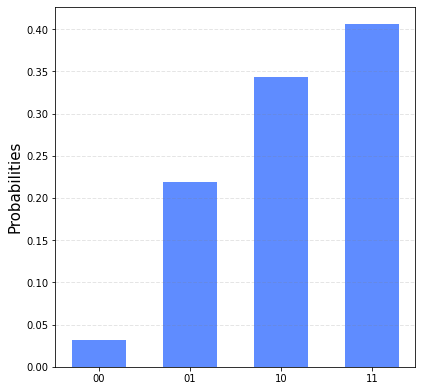

In [ ]:
def plothistogram(u, shots_val):
  su_m = np.zeros(4)
  for i in range(0,len(u)):
    su_m = np.add(su_m,u[i]*1/2**(i))
  su_m = (2**3)*su_m
  tot =0
  for j in range(0,len(su_m)):
    tot = tot + abs(su_m[j])

  probs = (tot/shots_val)*abs(su_m)
  probs = np.around(probs, decimals =4)

  pdata2 = {'00':probs[0],'01':probs[1], '10':probs[2], '11':probs[3]} 
  print(pdata2)
  fig = plt.figure(figsize = (5,5))
  ax = fig.add_axes([0,0,1,1])

  ax.bar(list(pdata2.keys()), list(pdata2.values()), width = 0.6, color = (0.3,0.5,1.0,0.9))
  xs = list(pdata2.keys())
  ys = list(pdata2.values())

  ax.yaxis.grid(b = True, color = 'grey', linestyle = '--', linewidth = 1, alpha =0.2)
  plt.ylabel('Probabilities', fontsize = 15)

  plt.show()

plothistogram(shots_val=1024)

Mathematically the solution of the equation is $$ x = \frac{1}{32}\begin{bmatrix} -1 \\ 7\\ 11\\ 13 \end{bmatrix}$$

Measuring the $|1\rangle$ state of Input register, i.e. qubit $q_6$ gives a solution of the form $$ x =\frac{8\pi}{2^r}\sum_{j=1}^4 \frac{1/2}{2^{j-1}}|u_j\rangle$$ which should be proportional to the expected solution.

The histogram gives the probabiltiy of each state 

Pr($|00\rangle$) = 0.0312 
Pr($|01\rangle$) = 0.2188
Pr($|10\rangle$) = 0.3438
Pr($|11\rangle$) = 0.4062

Clearly, $\Sigma Pr = 1$

The square roots of these Probabilities give the Amplitude, which are values proportinal to the vector elements of the required solution.

 $$ 0.0312\times \begin{bmatrix} 1 \\ 7\\ 11\\ 13 \end{bmatrix}$$
